<a href="https://colab.research.google.com/github/Jasleen8801/text_mining/blob/main/Lab_sheet_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Sheet6: Content Analysis**

Objective:
To understand and apply content analysis techniques such as text preprocessing, word frequency analysis, keyword extraction (TF-IDF), and sentiment analysis on a given text dataset using Python.

Instructions:

Task 1: Setup and Data Loading

Task 2: Text Preprocessing

* Clean the Text:Remove punctuation, convert text to lowercase, remove stop words, and tokenize the text.
* Tokenization (Optional):

If desired, further break down the cleaned text into individual tokens.

Task 3: Word Frequency Analysis
* Compute Word Frequency:
Count the frequency of each word in the cleaned text

Task 4: Keyword Extraction (TF-IDF)
* Compute TF-IDF: Use TfidfVectorizer from sklearn to extract important keywords.

Task 4: Sentiment Analysis
* Perform sentiment analysis: Use nltk's VADER tool for sentiment analysis.

* Categorize sentiment: Label text as positive, neutral, or negative based on sentiment score.

* Analyze Sentiment Distribution:
Plot a pie chart to show the distribution of positive, negative, and neutral reviews.

In [2]:
import os
import tarfile
import urllib.request

url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
dataset_folder = './aclImdb'

if not os.path.exists(dataset_folder):
    urllib.request.urlretrieve(url, 'aclImdb_v1.tar.gz')

    with tarfile.open('aclImdb_v1.tar.gz', 'r:gz') as tar:
        tar.extractall()

train_pos_dir = './aclImdb/train/pos/'
train_neg_dir = './aclImdb/train/neg/'


In [3]:
import pandas as pd

def load_reviews_from_directory(directory):
    reviews = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
                reviews.append(file.read())
    return reviews

positive_reviews = load_reviews_from_directory(train_pos_dir)
negative_reviews = load_reviews_from_directory(train_neg_dir)

df_pos = pd.DataFrame({'review': positive_reviews, 'sentiment': 'positive'})
df_neg = pd.DataFrame({'review': negative_reviews, 'sentiment': 'negative'})

df = pd.concat([df_pos, df_neg], ignore_index=True)

In [4]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_review'] = df['review'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
from collections import Counter

all_words = ' '.join(df['cleaned_review']).split()

word_freq = Counter(all_words)

print("Most common words:", word_freq.most_common(10))

Most common words: [('br', 57143), ('movie', 41807), ('film', 37455), ('one', 25508), ('like', 19641), ('good', 14555), ('even', 12503), ('would', 12135), ('time', 11779), ('really', 11663)]


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_review'])

keywords = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

tfidf_df = pd.DataFrame(tfidf_scores, columns=keywords)
print(tfidf_df.head())

         br      even      film      good      like     movie       one  \
0  0.413943  0.000000  0.870298  0.266895  0.000000  0.000000  0.000000   
1  0.712755  0.000000  0.149854  0.000000  0.165644  0.561954  0.296539   
2  0.501830  0.000000  0.000000  0.000000  0.000000  0.659427  0.173987   
3  0.430965  0.589402  0.000000  0.555740  0.250391  0.212365  0.224127   
4  0.000000  0.000000  0.613491  0.000000  0.678137  0.000000  0.404671   

    really      time     would  
0  0.00000  0.000000  0.000000  
1  0.00000  0.195853  0.000000  
2  0.47806  0.000000  0.233474  
3  0.00000  0.000000  0.000000  
4  0.00000  0.000000  0.000000  


In [8]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['predicted_sentiment'] = df['cleaned_review'].apply(get_sentiment)

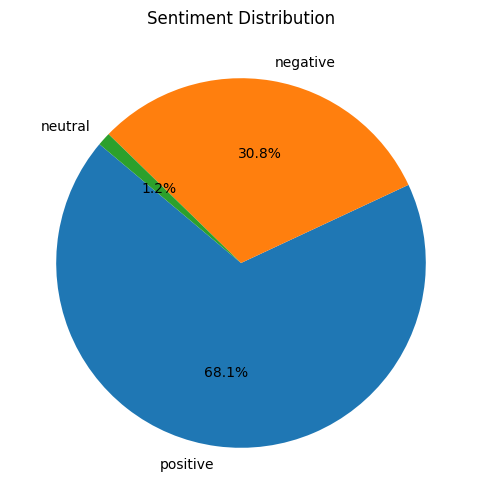

In [10]:
import matplotlib.pyplot as plt

sentiment_counts = df['predicted_sentiment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()